# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities
Observations :
- The highest temperature is near 0 latitude near the equator and it decreses as the latitude decreses on both sides.
- For the cloudiness and wind spedd latitude doesnt seem to have much impact.
- The templerature is on on the ideal side at the negative latiude (Southern Hemisphere)

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")



Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
base_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity =city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sardarshahr
Processing Record 2 of Set 1 | uruzgan
Processing Record 3 of Set 1 | hofn
Processing Record 4 of Set 1 | adrar
Processing Record 5 of Set 1 | port hardy
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | yunjinghong
City not found. Skipping...
Processing Record 12 of Set 1 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 13 of Set 1 | bama
Processing Record 14 of Set 1 | port lincoln
Processing Record 15 of Set 1 | alekseyevsk
Processing Record 16 of Set 1 | rio grande
Processing Record 17 of Set 1 | te anau
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | cherskiy
Processing Record 20 of Set 1 | geraldton
Processing

Processing Record 35 of Set 4 | cabo san lucas
Processing Record 36 of Set 4 | shima
Processing Record 37 of Set 4 | tasiilaq
Processing Record 38 of Set 4 | thompson
Processing Record 39 of Set 4 | nemuro
Processing Record 40 of Set 4 | tuatapere
Processing Record 41 of Set 4 | saint-joseph
Processing Record 42 of Set 4 | yozgat
Processing Record 43 of Set 4 | gabu
Processing Record 44 of Set 4 | mamallapuram
Processing Record 45 of Set 4 | anloga
Processing Record 46 of Set 4 | port blair
Processing Record 47 of Set 4 | mbanza-ngungu
Processing Record 48 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 49 of Set 4 | canavieiras
Processing Record 0 of Set 5 | bonavista
Processing Record 1 of Set 5 | juneau
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | manggar
Processing Record 4 of Set 5 | camacha
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | sistranda
Processing Record 7 of Set 5 | vaitupu
City not found. Skippin

Processing Record 29 of Set 8 | kamloops
Processing Record 30 of Set 8 | tahe
Processing Record 31 of Set 8 | perelyub
Processing Record 32 of Set 8 | kloulklubed
Processing Record 33 of Set 8 | melur
Processing Record 34 of Set 8 | baloda bazar
Processing Record 35 of Set 8 | fortuna
Processing Record 36 of Set 8 | pochutla
Processing Record 37 of Set 8 | tarija
Processing Record 38 of Set 8 | geresk
City not found. Skipping...
Processing Record 39 of Set 8 | asfi
Processing Record 40 of Set 8 | khuzhir
Processing Record 41 of Set 8 | talnakh
Processing Record 42 of Set 8 | tomari
Processing Record 43 of Set 8 | mahibadhoo
Processing Record 44 of Set 8 | loding
Processing Record 45 of Set 8 | krasnik
Processing Record 46 of Set 8 | henties bay
Processing Record 47 of Set 8 | neftcala
Processing Record 48 of Set 8 | yulara
Processing Record 49 of Set 8 | madhugiri
Processing Record 0 of Set 9 | muzhi
Processing Record 1 of Set 9 | nanakuli
Processing Record 2 of Set 9 | trapani
Process

Processing Record 18 of Set 12 | aranda de duero
Processing Record 19 of Set 12 | santa cruz
Processing Record 20 of Set 12 | storforshei
Processing Record 21 of Set 12 | robertsport
Processing Record 22 of Set 12 | nizhniye vyazovyye
Processing Record 23 of Set 12 | sao raimundo nonato
Processing Record 24 of Set 12 | hualmay
Processing Record 25 of Set 12 | merauke
Processing Record 26 of Set 12 | oriximina
Processing Record 27 of Set 12 | calama
Processing Record 28 of Set 12 | vilhena
Processing Record 29 of Set 12 | tommot
Processing Record 30 of Set 12 | zheleznodorozhnyy
Processing Record 31 of Set 12 | illela
Processing Record 32 of Set 12 | stockholm
Processing Record 33 of Set 12 | ust-omchug
Processing Record 34 of Set 12 | mandera
Processing Record 35 of Set 12 | pisco
Processing Record 36 of Set 12 | miquelon
Processing Record 37 of Set 12 | panjakent
Processing Record 38 of Set 12 | ruwi
Processing Record 39 of Set 12 | sorkjosen
Processing Record 40 of Set 12 | muncar
Pr

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame.from_records(city_data)
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [7]:
# Display sample data
city_data_df = city_data_df.rename(columns={"Lat":"Latitude","Lng":"Longitude"})
city_data_df.sample(50)


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
174,gabu,12.2833,-14.2167,36.51,16,19,2.05,GW,1680809069
332,yar-sale,66.8333,70.8333,-23.54,85,79,4.39,RU,1680808984
146,yashkino,55.8736,85.4265,1.54,72,15,4.41,RU,1680809066
424,hervey bay,-25.2986,152.8535,23.27,74,90,2.53,AU,1680808931
183,manggar,-2.8833,108.2667,25.72,83,100,1.25,ID,1680808982
407,la ronge,55.1001,-105.2842,0.12,34,0,3.09,CA,1680809023
210,lagunas,-5.2269,-75.6753,34.06,42,74,1.83,PE,1680809075
421,uyuni,-20.4597,-66.8250,14.33,19,0,4.16,BO,1680809102
496,santa maria,-29.6842,-53.8069,19.61,94,75,5.66,BR,1680809119
488,santa rosa,14.3122,121.1114,26.99,76,100,1.90,PH,1680809118


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sardarshahr,28.4333,74.4833,25.59,29,0,4.68,IN,1680809041
1,uruzgan,32.8333,66.0000,12.34,32,0,0.44,AF,1680809041
2,hofn,64.2539,-15.2082,5.96,68,6,6.56,IS,1680808925
3,adrar,20.5022,-10.0711,25.00,18,0,3.62,MR,1680808934
4,port hardy,50.6996,-127.4199,9.10,76,100,11.83,CA,1680808938


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

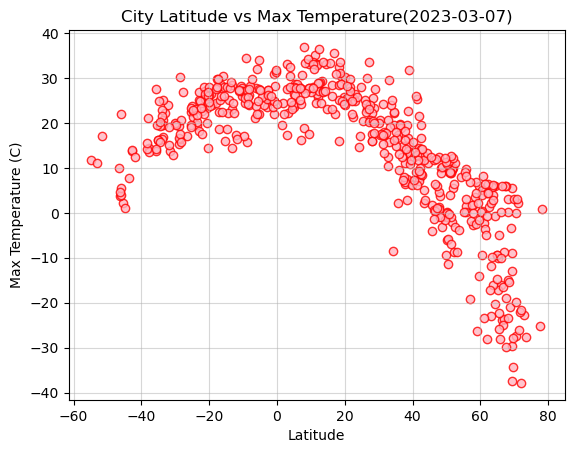

In [10]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Latitude"],city_data_df["Max Temp"], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)
# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature(2023-03-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle="-",alpha = 0.5)
# Save the figure
plt.savefig("output_data/Latitude vs Max Temperature.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

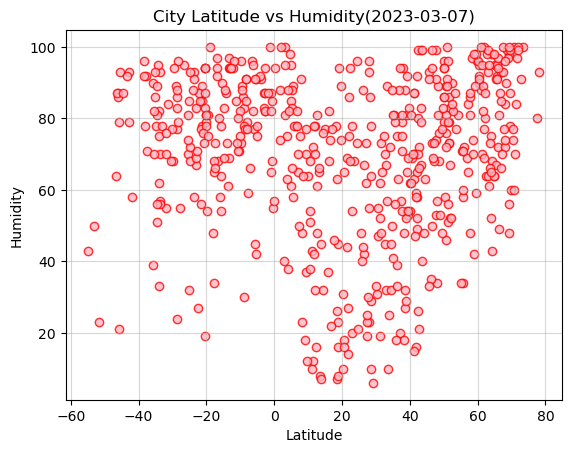

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Latitude"],city_data_df["Humidity"], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity(2023-03-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle="-",alpha = 0.5)

# Save the figure
plt.savefig("output_data/Latitude vs Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

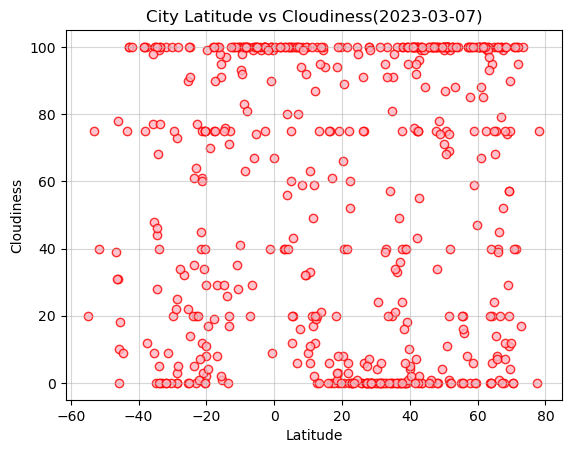

In [12]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Latitude"],city_data_df["Cloudiness"], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness(2023-03-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle="-",alpha = 0.5)

# Save the figure
plt.savefig("output_data/Latitude vs Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

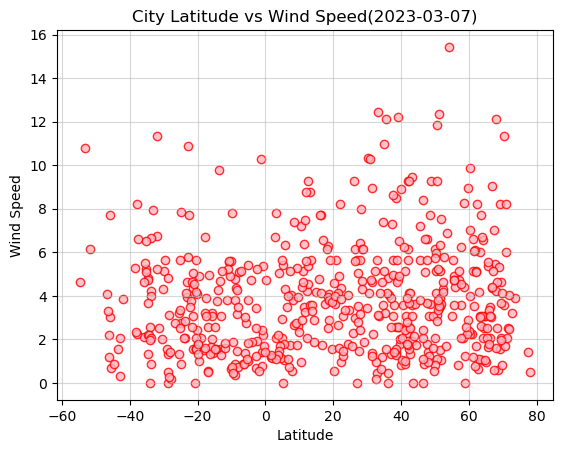

In [13]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Latitude"],city_data_df["Wind Speed"], facecolor = "lightpink",edgecolor = "red",alpha = 0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed(2023-03-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle="-",alpha = 0.5)

# Save the figure
plt.savefig("output_data/Latitude vs Wind Speed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderrr) = linregress(x,y)
    print(f"r-squared value is {round(st.pearsonr(x,y)[0],2)}")
    regress_values = round(slope,2) * x + round(intercept,2)
    equation = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y,facecolor = "lightpink",edgecolor = "red",alpha = 0.8)
    plt.plot(x, regress_values, color='red')
    return equation
    

In [15]:
def annotation(equation, x_value,y_value):
     plt.annotate(equation,(x_value,y_value), color='black')

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Latitude"] >=0 ]
# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sardarshahr,28.4333,74.4833,25.59,29,0,4.68,IN,1680809041
1,uruzgan,32.8333,66.0000,12.34,32,0,0.44,AF,1680809041
2,hofn,64.2539,-15.2082,5.96,68,6,6.56,IS,1680808925
3,adrar,20.5022,-10.0711,25.00,18,0,3.62,MR,1680808934
4,port hardy,50.6996,-127.4199,9.10,76,100,11.83,CA,1680808938


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Latitude"] < 0 ]


# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,cape town,-33.9258,18.4232,19.50,82,40,2.57,ZA,1680808653
10,port lincoln,-34.7333,135.8667,16.11,78,0,4.83,AU,1680808938
12,rio grande,-32.0350,-52.0986,24.06,55,100,6.75,BR,1680809047
13,te anau,-45.4167,167.7167,2.09,93,18,0.69,NZ,1680808625
14,ushuaia,-54.8000,-68.3000,11.81,43,20,4.63,AR,1680808923


###  Temperature vs. Latitude Linear Regression Plot

r-squared value is -0.86


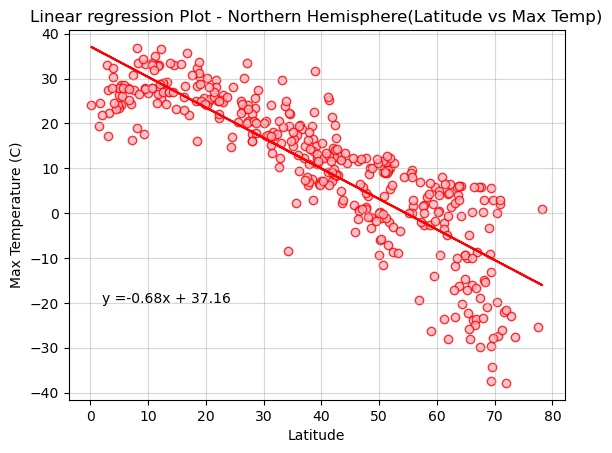

In [18]:
# Linear regression on Northern Hemisphere
line_equation = linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Max Temp"])
annotation(line_equation,2,-20)
plt.title("Linear regression Plot - Northern Hemisphere(Latitude vs Max Temp)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Northern Hemisphere(Latitude vs Max Temp).png")


r-squared value is 0.71


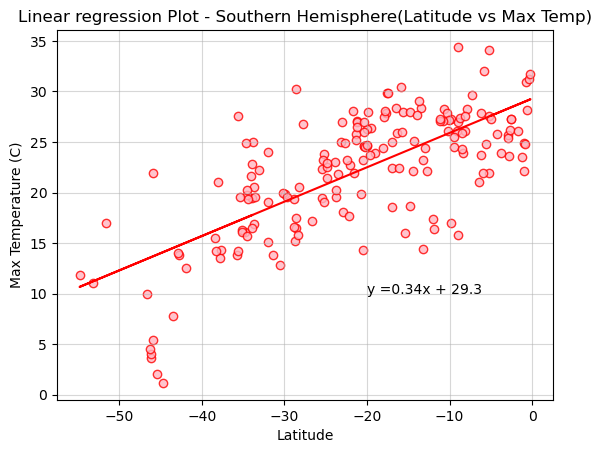

In [19]:
# Linear regression on Southern Hemisphere
line_equation = linear_regression(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp"])
annotation(line_equation,-20,10)
plt.title("Linear regression Plot - Southern Hemisphere(Latitude vs Max Temp)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Southern Hemisphere(Latitude vs Max Temp).png")

**Discussion about the linear relationship:**  For the Northern hemisphere, there is a strong negative co relation between the latitude and max temperature. It is observed from the graph as well as the latitude increases the max temperature decreases.
For the southern hemisphere the co relation is moderately positive.

### Humidity vs. Latitude Linear Regression Plot

r-squared value is 0.35


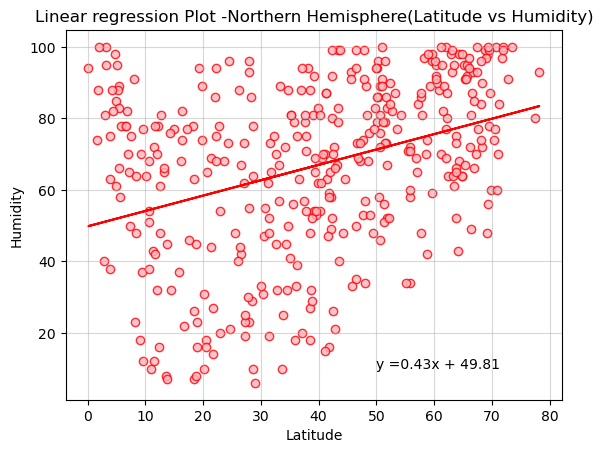

In [20]:
# Northern Hemisphere
line_equation = linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Humidity"])
annotation(line_equation,50,10)
plt.title("Linear regression Plot -Northern Hemisphere(Latitude vs Humidity)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Northern Hemisphere(Latitude Humidity).png")

r-squared value is 0.17


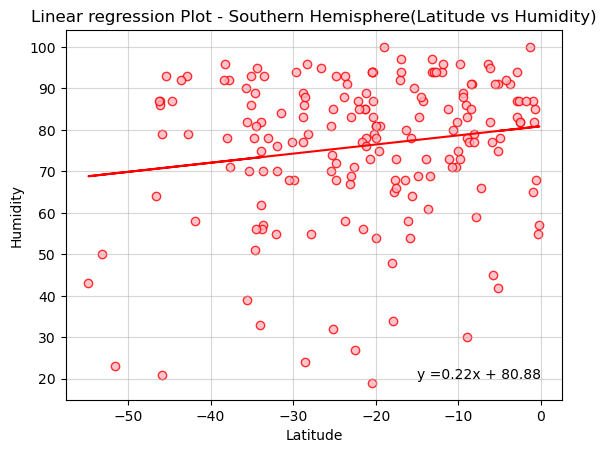

In [21]:
# Southern Hemisphere
line_equation = linear_regression(southern_hemi_df["Latitude"], southern_hemi_df["Humidity"])
annotation(line_equation,-15,20)
plt.title("Linear regression Plot - Southern Hemisphere(Latitude vs Humidity)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Southern Hemisphere(Latitude vs Humidity).png")

**Discussion about the linear relationship:** The correlation between latitude and humidity for both southern and northern hemisphere is towards the less positive.

### Cloudiness vs. Latitude Linear Regression Plot

r-squared value is 0.09


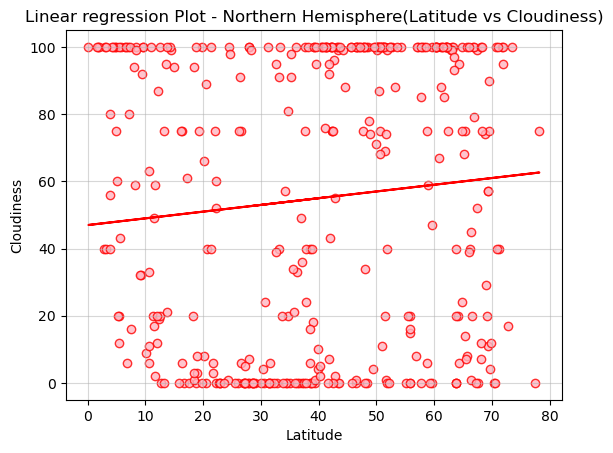

In [22]:
# Northern Hemisphere
line_equation = linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Cloudiness"])
annotation(line_equation,2,-20)
plt.title("Linear regression Plot - Northern Hemisphere(Latitude vs Cloudiness)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Northern Hemisphere(Latitude vs Cloudiness).png")

r-squared value is 0.33


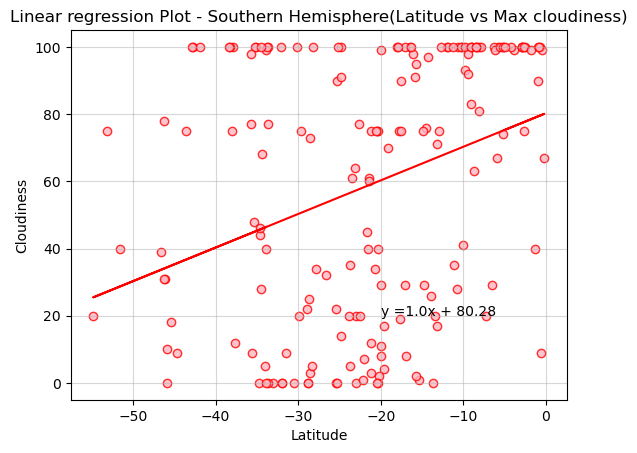

In [23]:
# Southern Hemisphere
line_equation = linear_regression(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness"])
annotation(line_equation,-20,20)
plt.title("Linear regression Plot - Southern Hemisphere(Latitude vs Max cloudiness)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Southern Hemisphere(Latitude vs Cloudiness).png")

**Discussion about the linear relationship:** For the Northern hemisphere there is very less correlation between cloudiness and latitude. For the southern hemisphere the correlation between latitude and cloudiness is moderately positive.

### Wind Speed vs. Latitude Linear Regression Plot

r-squared value is 0.03


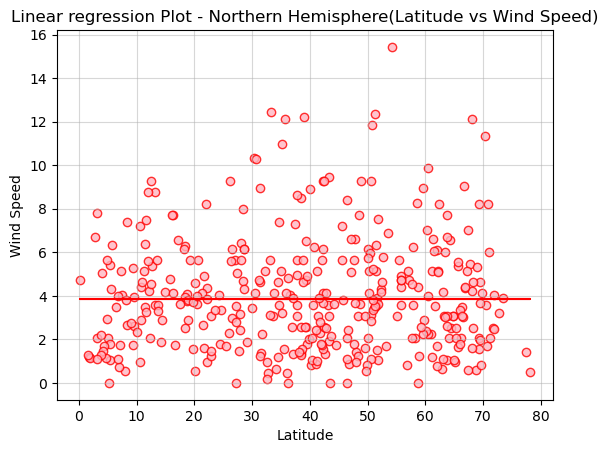

In [24]:
# Northern Hemisphere
line_equation = linear_regression(northern_hemi_df["Latitude"], northern_hemi_df["Wind Speed"])
annotation(line_equation,2,-20)
plt.title("Linear regression Plot - Northern Hemisphere(Latitude vs Wind Speed)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Northern Hemisphere(Latitude vs Wind Speed).png")

r-squared value is -0.17


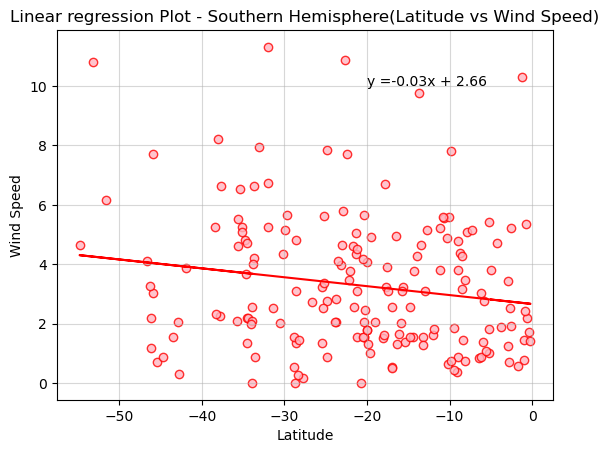

In [25]:
# Southern Hemisphere
line_equation = linear_regression(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"])
annotation(line_equation,-20,10)
plt.title("Linear regression Plot - Southern Hemisphere(Latitude vs Wind Speed)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(linestyle="-",alpha = 0.5)
plt.savefig("output_data/Linear regression Plot - Southern Hemisphere(Latitude vs Wind Speed).png")

**Discussion about the linear relationship:** The correlation between latitude and wind speed is moderately negative at the southern hemisphere and almost negiligible at the Northern hemisphere.